In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

from PIL import Image
from torchvision import transforms


In [2]:
test_directory = '../data/test/'
train_directory = '../data/train/'


In [3]:
directory = '../data/test/'
def load_datasets(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)
            #print(label,'loaded complete')
    return (image_paths,labels)


In [4]:
train = pd.DataFrame()
train['image'],train['label'] = load_datasets(train_directory)

In [5]:
train = train.sample(frac = 1).reset_index(drop=True)
train.head()

,image,label
0,../data/train/angry/Training_32007227.jpg,angry
1,../data/train/sad/Training_60883262.jpg,sad
2,../data/train/neutral/Training_40596970.jpg,neutral
3,../data/train/sad/Training_7549724.jpg,sad
4,../data/train/neutral/Training_22098495.jpg,neutral


In [6]:
test  = pd.DataFrame()
test['image'],test['label'] = load_datasets(test_directory)

In [7]:
test = test.sample(frac = 1).reset_index(drop = True)
test.head()

,image,label
0,../data/test/angry/PublicTest_89421273.jpg,angry
1,../data/test/surprise/PrivateTest_58564335.jpg,surprise
2,../data/test/sad/PrivateTest_6307548.jpg,sad
3,../data/test/happy/PublicTest_3101855.jpg,happy
4,../data/test/fear/PublicTest_977248.jpg,fear


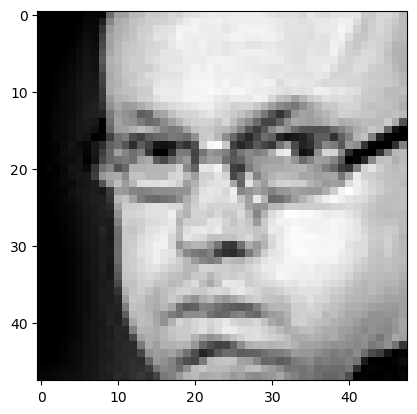

In [8]:
img = Image.open(train['image'][0])
plt.imshow(img,cmap = 'gray')

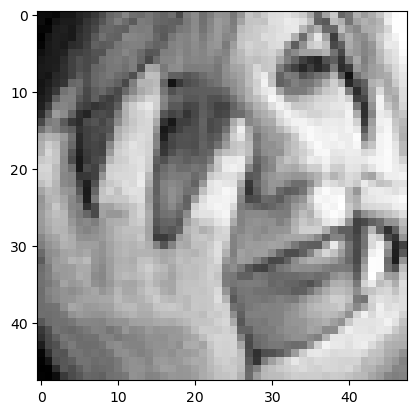

In [9]:
img = Image.open(train['image'][1])
plt.imshow(img,cmap='gray')

In [24]:
def extract_features(image_paths):
    transforms_pipeline = transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((48,48)),
        transforms.ToTensor()])

    features = []
    for path in image_paths:
        img = Image.open(path).convert('RGB')
        img = transforms_pipeline(img)
        features.append(img)
    
    features = torch.stack(features)
    return features

In [26]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = torch.tensor(y_train,dtype = torch.long)
y_test= torch.tensor(y_test,dtype = torch.long)

print(y_train)

tensor([0, 5, 4,  ..., 3, 5, 3])
